In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [3]:
train_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
test_df.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


# Exploratory Data Analysis

In [5]:
print(f"Train data size: {train_df.shape}")
print(f"Test data size: {test_df.shape}")

Train data size: (7613, 5)
Test data size: (3263, 4)


In [6]:
print("Information on training data: ")
train_df.describe()

Information on training data: 


,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [7]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
# Count of real(1) and not real(0) disasters in train data

train_df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

<Axes: ylabel='target'>

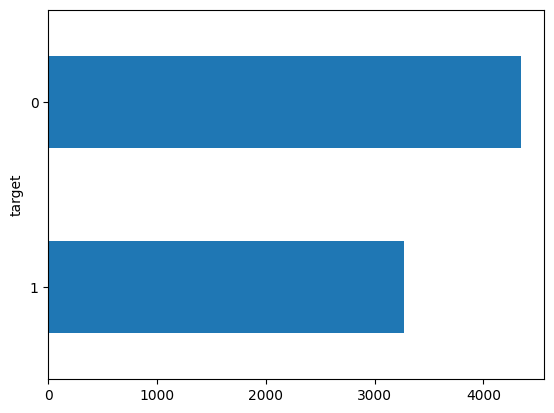

In [9]:
# Plot 
train_df.target.value_counts().sort_values().plot(kind = 'barh')

## Word cloud 
To see frequently occurring words in the tweets.

Reference: https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-qiqc/notebook

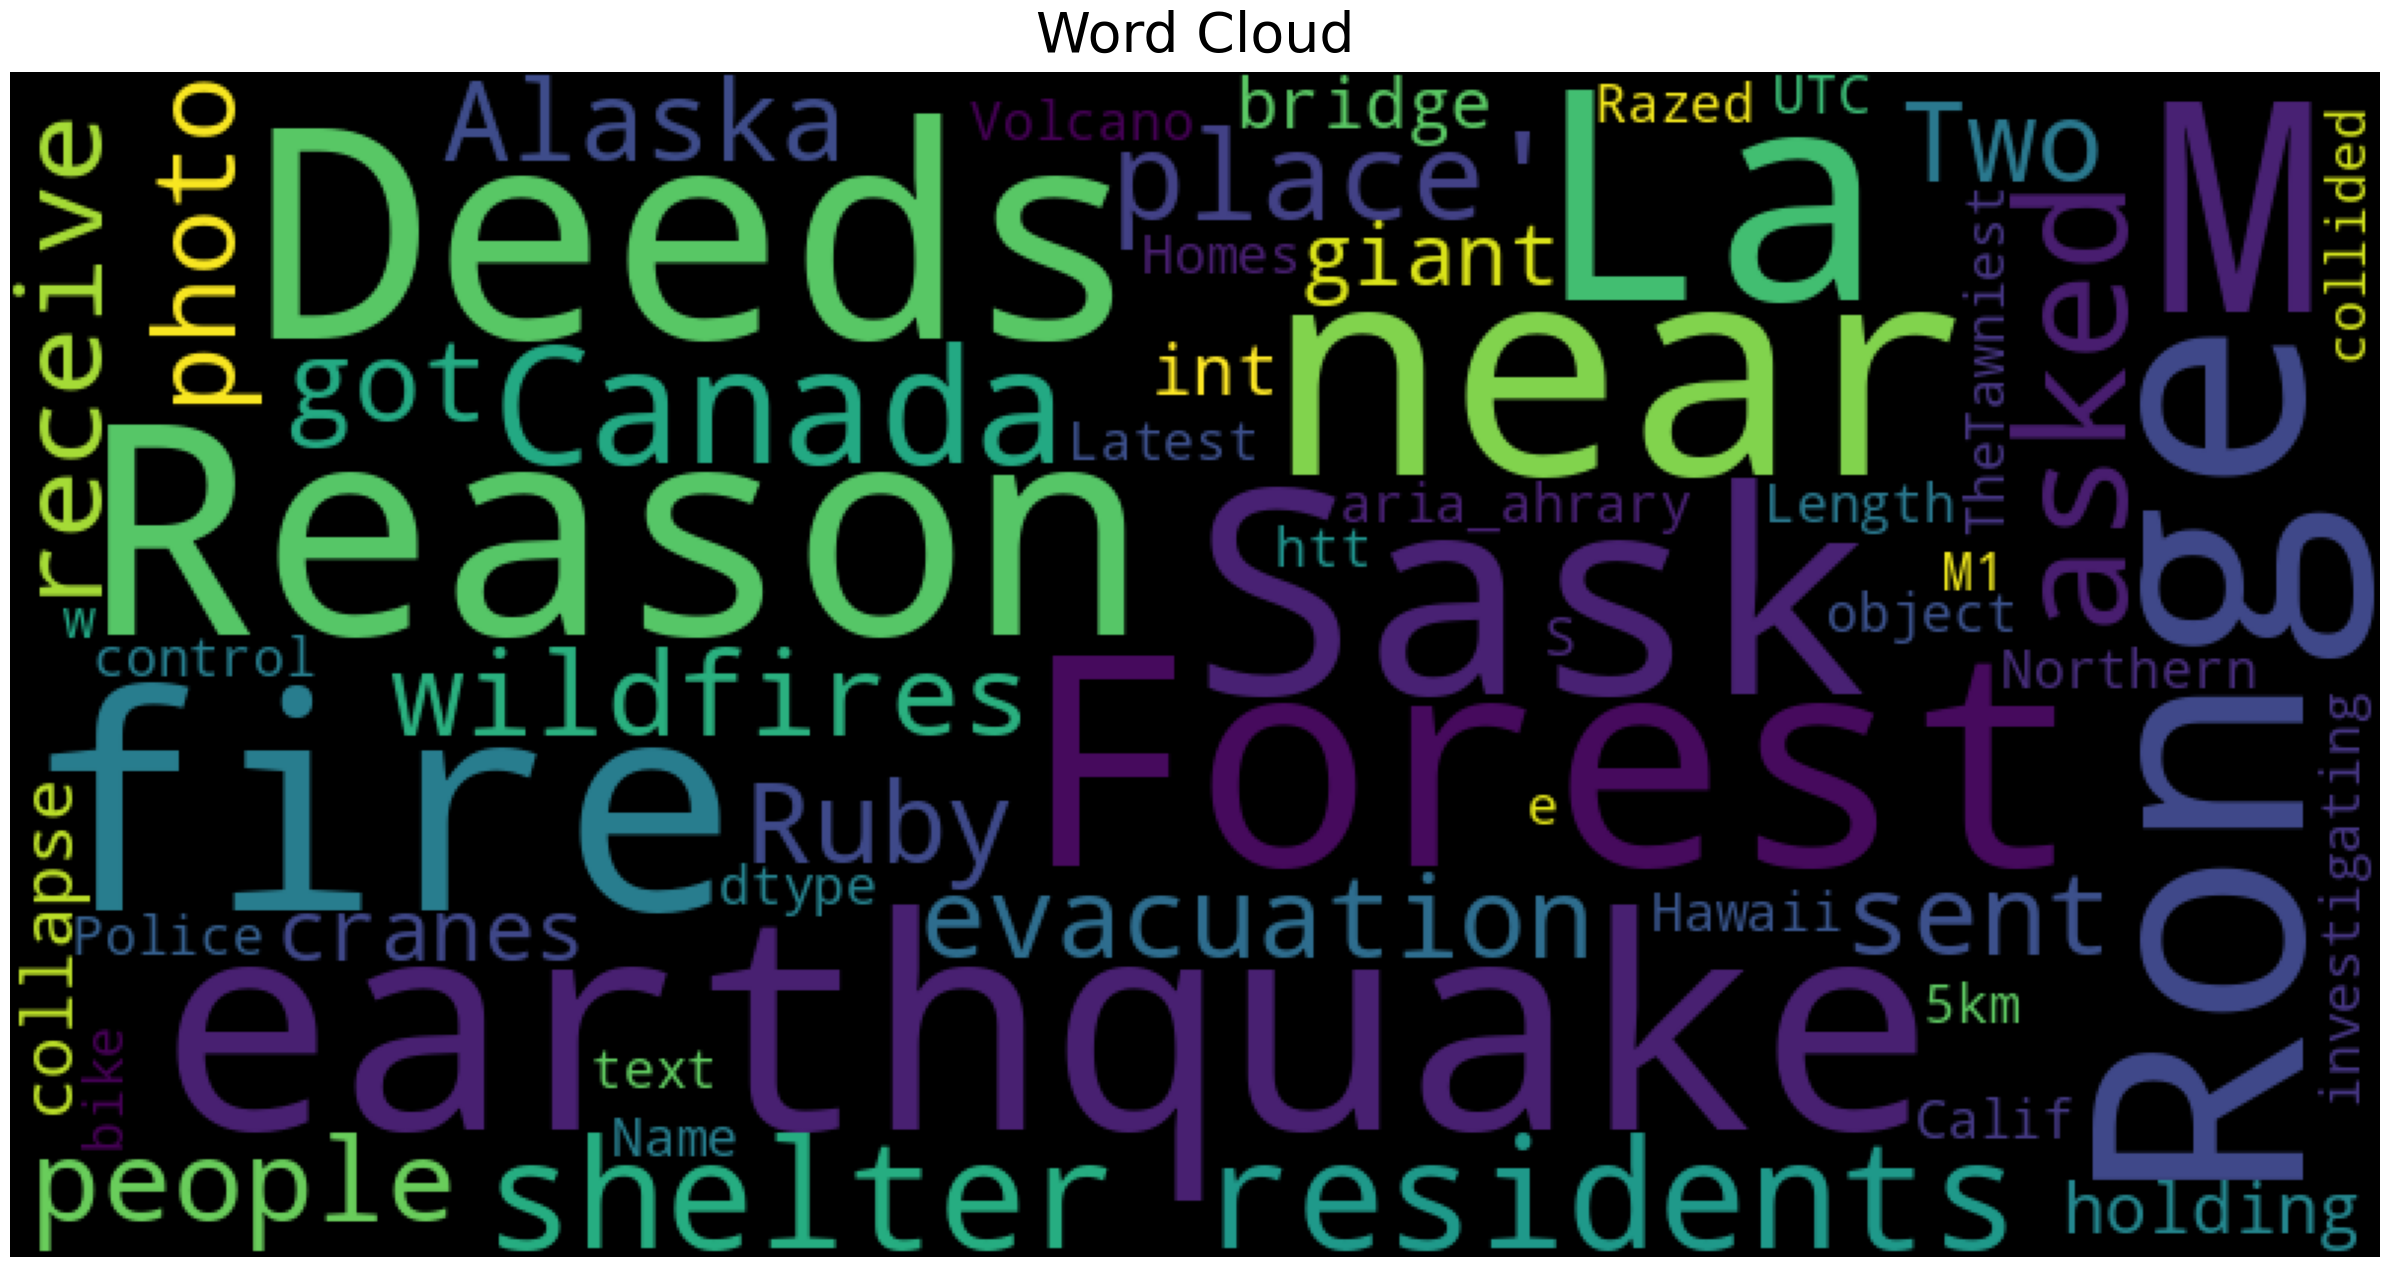

In [10]:
from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask=None, max_words=500, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(train_df["text"], title="Word Cloud")

## Character level tweet analysis
Reference: https://www.kaggle.com/code/shahules/basic-eda-cleaning-and-glove

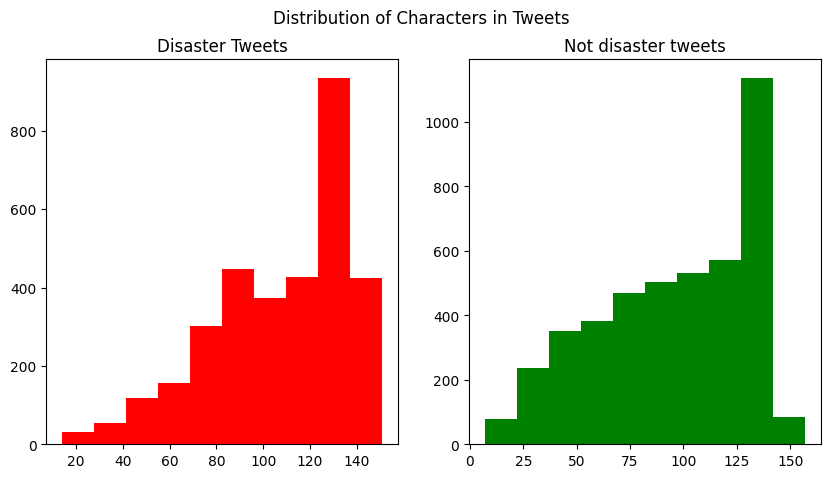

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

real_tweet_length = train_df[train_df['target'] == 1]['text'].str.len() # str is an accessor to apply len() to a df of strings
ax1.hist(real_tweet_length,color='red')
ax1.set_title('Disaster Tweets')
not_real_tweet_length = train_df[train_df['target'] == 0]['text'].str.len()
ax2.hist(not_real_tweet_length,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Distribution of Characters in Tweets')
plt.show()

## Number of words in Tweets

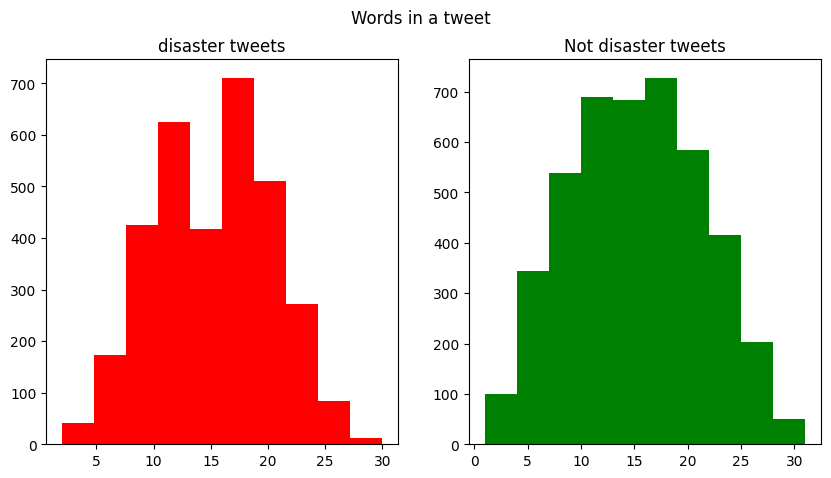

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
words = train_df[train_df['target'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(words ,color='red')
ax1.set_title('disaster tweets')
words =train_df[train_df['target'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(words ,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

## Most common words

In [13]:
# Returns the list of words in a target class

def obtain_words(clss): 
    word_list = []
    for x in train_df[train_df['target'] == clss]['text'].str.split(): 
        for word in x: 
            word_list.append(word)
    return word_list

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: >

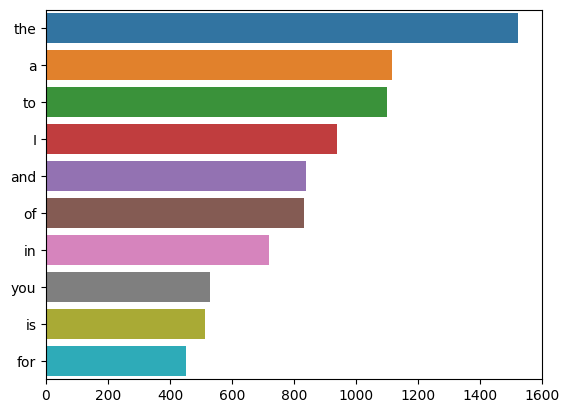

In [14]:
from collections import  Counter # returns a dictionary of word vs freq of occurrence
import seaborn as sns

words = obtain_words(0)
word_list = Counter(words)
common = word_list.most_common(10) # prints 10 most common words. 
x=[] 
y=[]
for word,count in common:
        y.append(word)
        x.append(count)
sns.barplot(x=x,y=y)


## N gram analysis 
Reference: https://www.kaggle.com/code/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert

In [15]:
from wordcloud import STOPWORDS

def generate_ngrams(text, n_gram=1):
    # Tokenize text, filter out stopwords.
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    
    # Gives a list of tuples, each tuple is an n gram.
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    
    return [' '.join(ngram) for ngram in ngrams]


In [16]:
from collections import defaultdict

# Bigram 
disaster_bigrams = defaultdict(int) # default dict sets each new key to 0 by defualt.
nondisaster_bigrams = defaultdict(int)

for tweet in train_df[train_df['target'] == 1]['text']: 
    bigrams = generate_ngrams(tweet, 2)
    for item in bigrams: 
        disaster_bigrams[item] += 1 # Append each bigram to dict
        
for tweet in train_df[train_df['target'] == 0]['text']: 
    bigrams = generate_ngrams(tweet, 2)
    for item in bigrams: 
        nondisaster_bigrams[item] += 1

        
# Trigram 
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
# converts dict into list of tuples (bigram, count) and sorts in descending as per count - so x[1]
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

disaster_trigrams = defaultdict(int) # default dict sets each new key to 0 by defualt.
nondisaster_trigrams = defaultdict(int)

for tweet in train_df[train_df['target'] == 1]['text']: 
    trigrams = generate_ngrams(tweet, 3)
    for item in trigrams: 
        disaster_trigrams[item] += 1
        
for tweet in train_df[train_df['target'] == 0]['text']: 
    trigrams = generate_ngrams(tweet, 3)
    for item in trigrams: 
        nondisaster_trigrams[item] += 1
        
        
df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])



In [17]:
print(df_nondisaster_bigrams)

                    0   1
0              - full  60
1          cross body  38
2      @youtube video  34
3      liked @youtube  34
4          full reû_  25
...               ...  ..
32600         cool ;)   1
32601     london cool   1
32602        car fast   1
32603   summer lovely   1
32604     love fruits   1

[32605 rows x 2 columns]


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


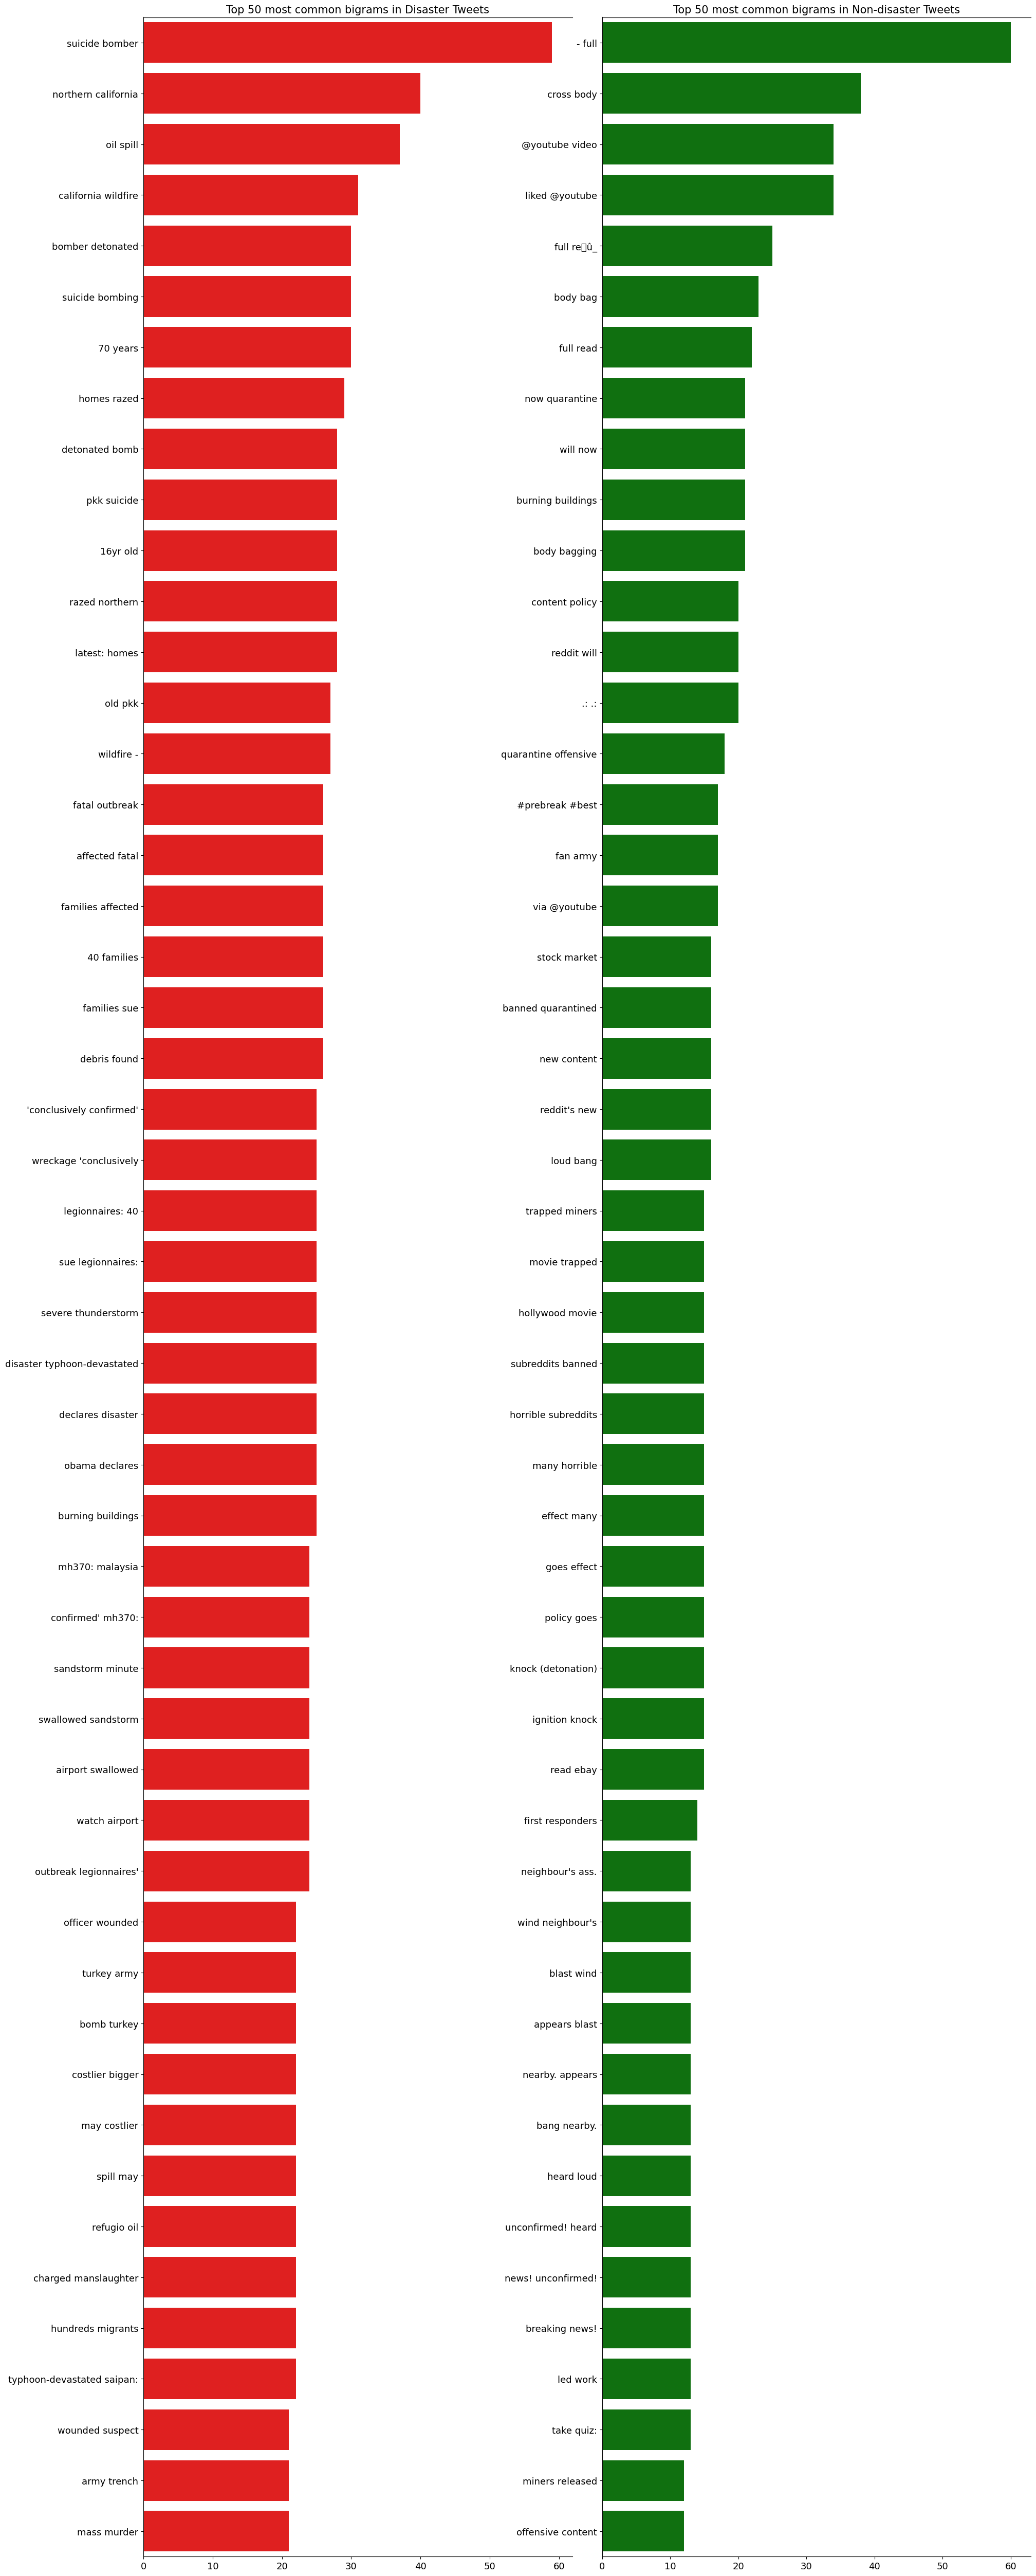

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()
N = 50
sns.barplot(y=df_disaster_bigrams[0].values[:N], x=df_disaster_bigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_bigrams[0].values[:N], x=df_nondisaster_bigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common bigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common bigrams in Non-disaster Tweets', fontsize=15)

plt.show()

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


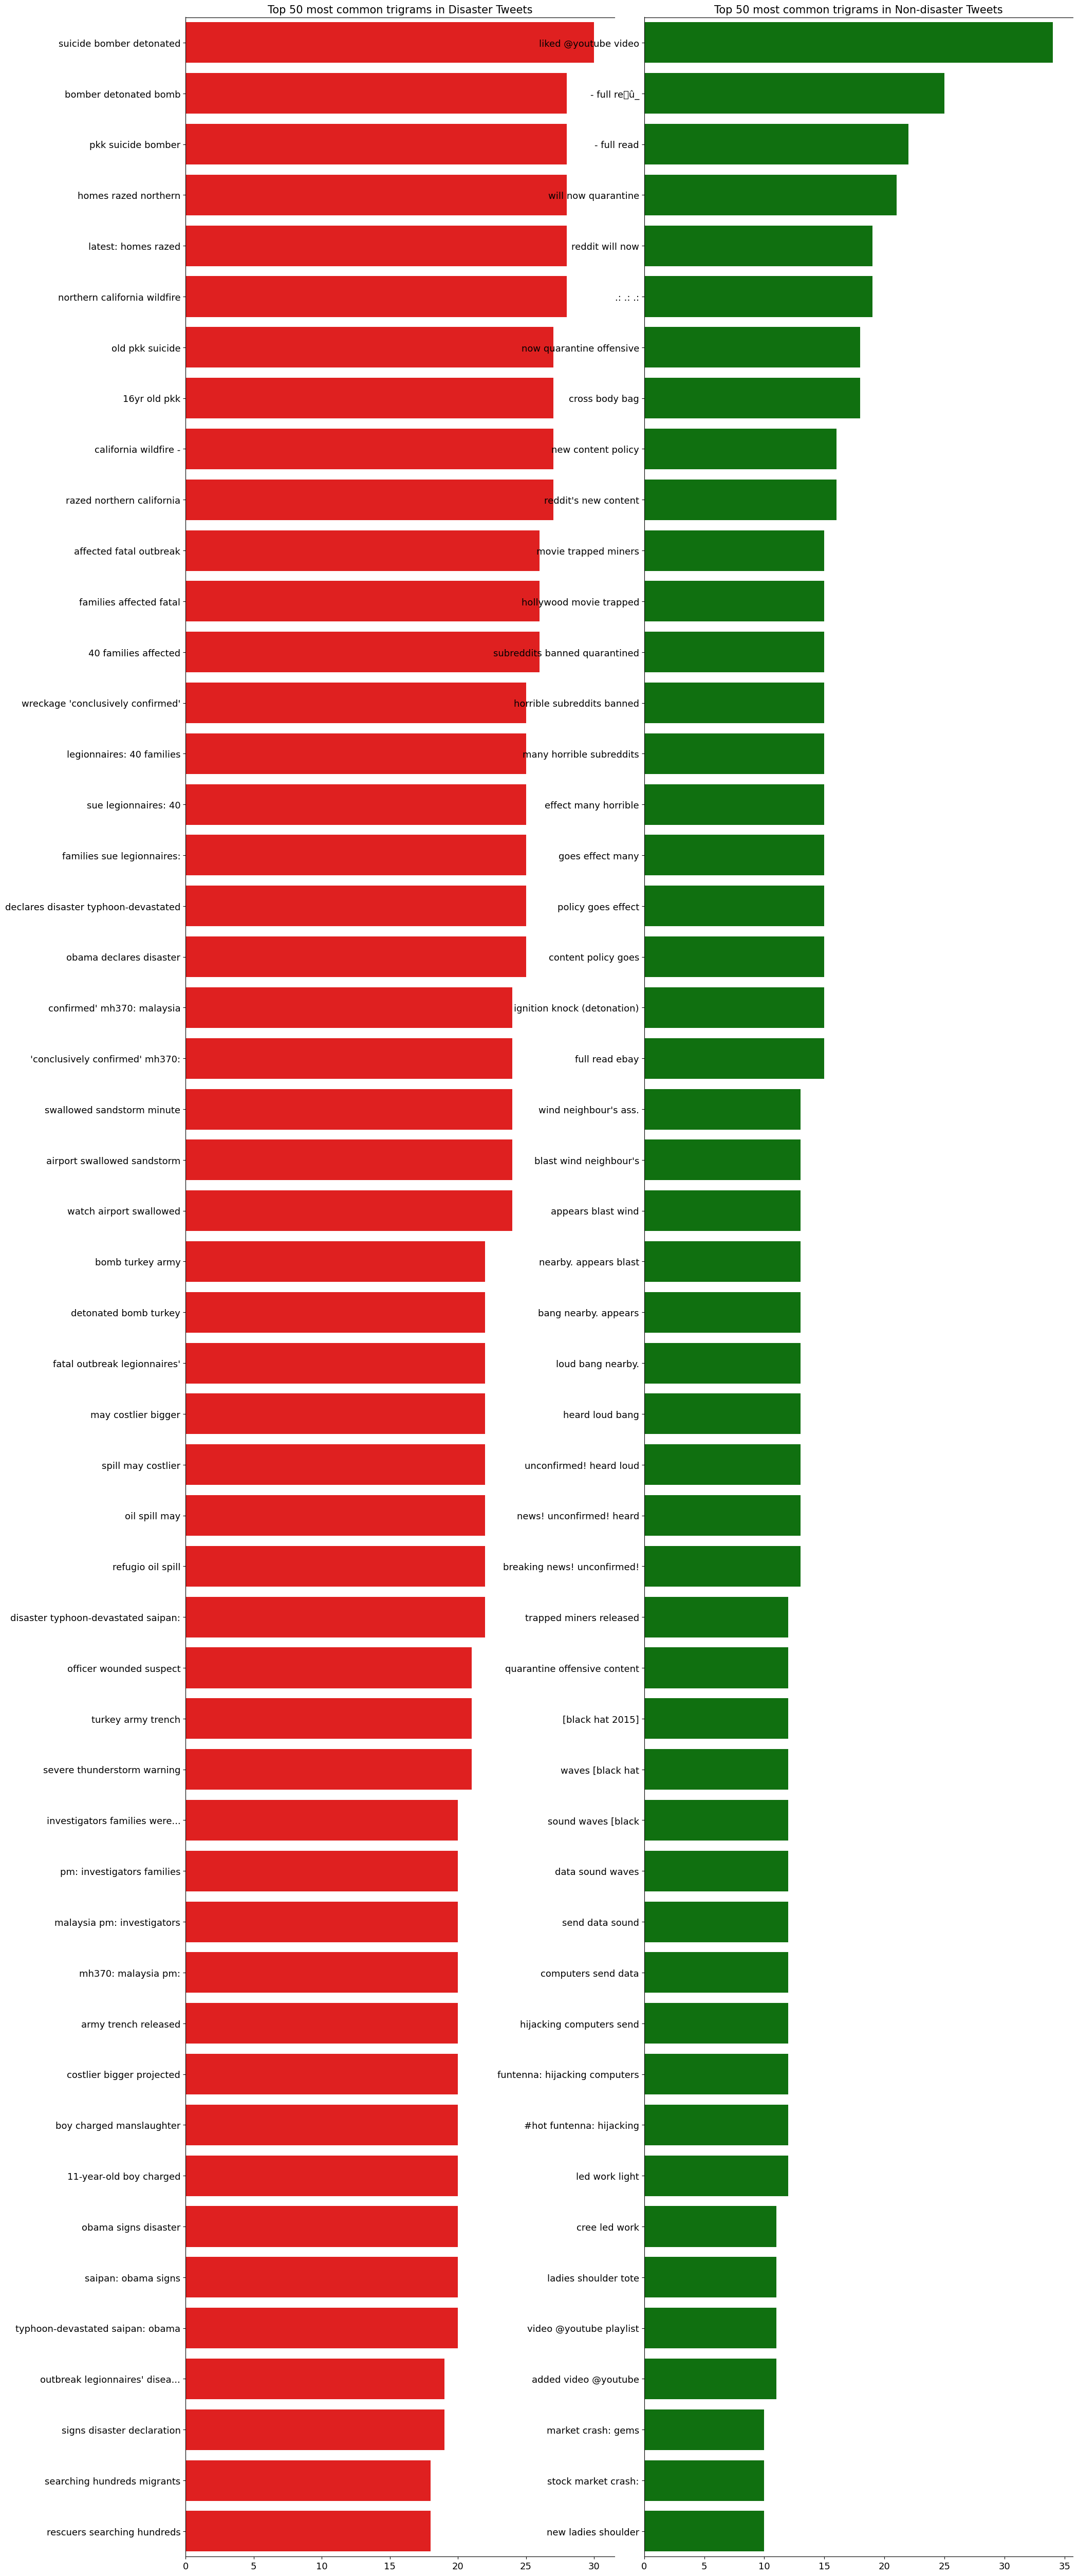

In [19]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 50), dpi=100)
plt.tight_layout()
N = 50
sns.barplot(y=df_disaster_trigrams[0].values[:N], x=df_disaster_trigrams[1].values[:N], ax=axes[0], color='red')
sns.barplot(y=df_nondisaster_trigrams[0].values[:N], x=df_nondisaster_trigrams[1].values[:N], ax=axes[1], color='green')

for i in range(2):
    axes[i].spines['right'].set_visible(False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)

axes[0].set_title(f'Top {N} most common trigrams in Disaster Tweets', fontsize=15)
axes[1].set_title(f'Top {N} most common trigrams in Non-disaster Tweets', fontsize=15)

plt.show()

## Steps in preprocessing: 
* Removal of punctuation
* Removal of hashtags
* Tokenization
* Lemmatization
* Removal of stop words
